In [1]:
# Copy and paste from
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
# with trivial modifications
#
# Author: Nobody in Computer Vision
# Date: 2022-03-05
# 
# Contacts:
# Company: Longer Vision Technology
# Email: jiapei@longervision.com
# Website: https://www.longervision.com

In [2]:
# Fashion MNIST reader

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('/media/lvision/Sabrent/datasets/fashion_mnist', kind='train')
print(X_train.shape)
print(X_train[0].shape)
print(y_train)
print(y_train.shape)


(60000, 784)
(784,)
[9 0 0 ... 3 0 5]
(60000,)


In [4]:
import time
import pandas as pd
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

<Figure size 432x288 with 0 Axes>

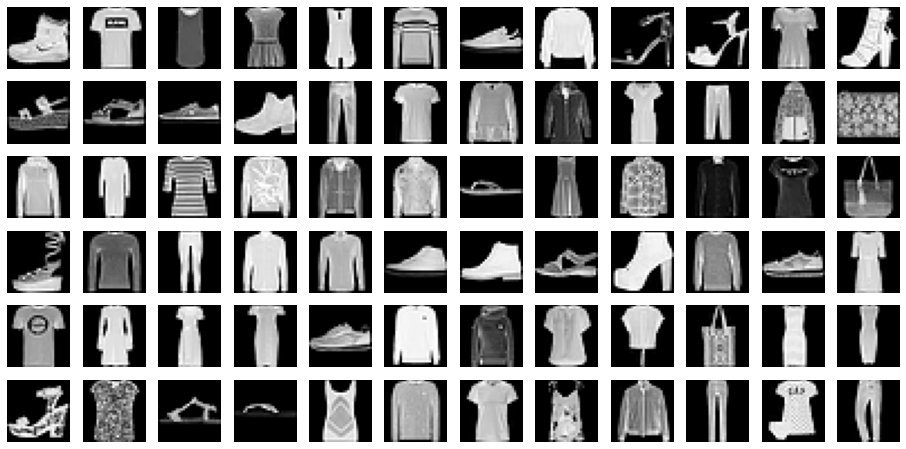

In [5]:
plt.gray()
fig = plt.figure(figsize=(16, 8))
columns = 12
rows = 6
for i in range(0, columns*rows):
    data = im.fromarray(X_train[i].reshape(28,28))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(data)
    plt.axis('off')
plt.show()


In [6]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [7]:
# Subset first 20k data points to visualize
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print (np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.5348165035247803 seconds


In [9]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


/tmp/ipykernel_3933556/2307473512.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(774.4497664223061, -689.6949155476061, '0'),
  Text(42.86381925975287, -1429.3643908539411, '1'),
  Text(1098.2843326494994, 376.97532331118737, '2'),
  Text(329.27198606825175, -1111.4898090914419, '3'),
  Text(1266.9709868256284, 295.46620085140637, '4'),
  Text(-1589.5573233916487, 61.867733944621115, '5'),
  Text(713.4727983678018, -65.6870112103383, '6'),
  Text(-1521.4109429506607, 335.66562530753083, '7'),
  Text(63.817681716998116, 1003.3250404594542, '8'),
  Text(-645.6906091270496, 1168.238403887924, '9')])

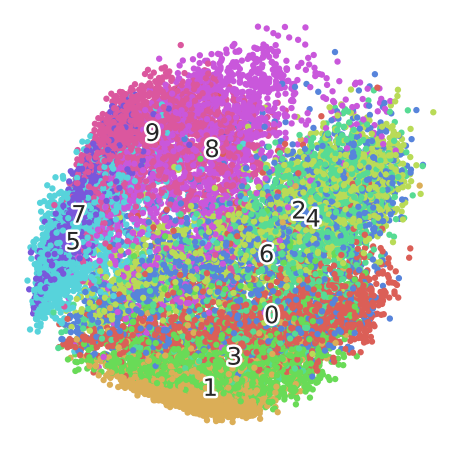

In [10]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [11]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(learning_rate='auto', init='pca', random_state=RS).fit_transform(x_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/lvision/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE done! Time elapsed: 45.03704285621643 seconds


/tmp/ipykernel_3933556/2307473512.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(778.7831, -690.5499, '0'),
  Text(41.839653, -1422.7478, '1'),
  Text(1117.2075, 377.60907, '2'),
  Text(336.99088, -1105.6271, '3'),
  Text(1268.7771, 291.67786, '4'),
  Text(-1574.2866, 44.31055, '5'),
  Text(716.95105, -71.590546, '6'),
  Text(-1506.3627, 342.83994, '7'),
  Text(67.689384, 1006.9206, '8'),
  Text(-646.5144, 1174.269, '9')])

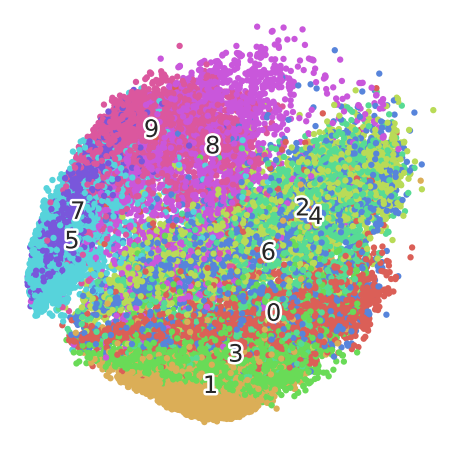

In [12]:
fashion_scatter(fashion_tsne, y_subset)

In [13]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print ('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 2.018453598022461 seconds
Cumulative variance explained by 50 principal components: 0.8625135013024849


In [14]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(learning_rate='auto', init='pca', random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/lvision/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE done! Time elapsed: 59.91525077819824 seconds


/tmp/ipykernel_3933556/2307473512.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(782.7402, -690.1889, '0'),
  Text(40.012688, -1424.8954, '1'),
  Text(1115.0133, 379.83078, '2'),
  Text(330.938, -1106.6307, '3'),
  Text(1275.2522, 285.24908, '4'),
  Text(-1579.6534, 48.903595, '5'),
  Text(719.25684, -78.809, '6'),
  Text(-1508.828, 345.81622, '7'),
  Text(72.70152, 1012.2786, '8'),
  Text(-645.2057, 1171.5784, '9')])

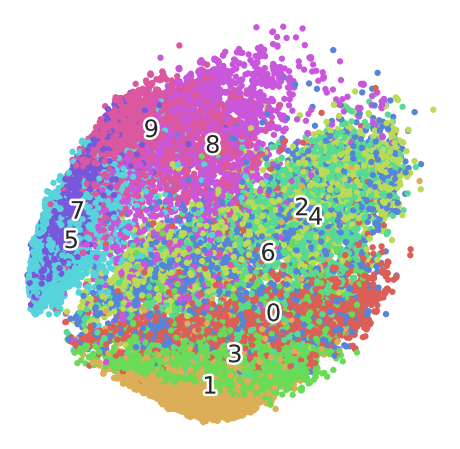

In [15]:
fashion_scatter(fashion_pca_tsne, y_subset)